CS4412: Data Mining  
Summer 2023  
Kennesaw State University  
**Homework 3**

In this project, we will explore the MNIST handwritten digits
dataset, available at:  
  http://yann.lecun.com/exdb/mnist/

The dataset included in this project was originally downloaded using TensorFlow:  
  https://www.tensorflow.org/datasets/catalog/mnist

In [1]:
# install numpy and scikit-learn, if needed
import numpy as np
from sklearn.linear_model import LogisticRegression
# I included a helper module for the project, for loading MNIST
from mnist import Mnist

In [3]:
# load the training dataset (used to train/learn the logistic regression model)
dataset = Mnist("train")
# load the testing dataset (used to test/evaluate the logistic regression model)
test_dataset = Mnist("test")

MNIST is a dataset of handwritten image.

The dataset contains 55,000 images, and each image has 28x28 = 784 pixels.

For the purposes of this project, we are dealing with pure black and white images (not grayscale).

Below, we plot three example digits from the dataset.

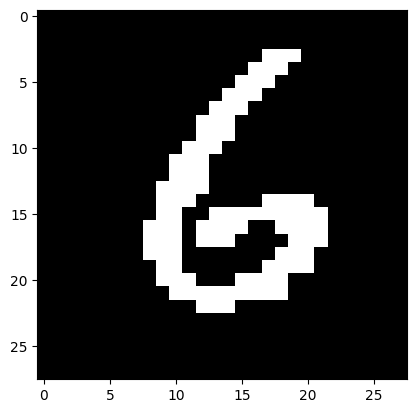

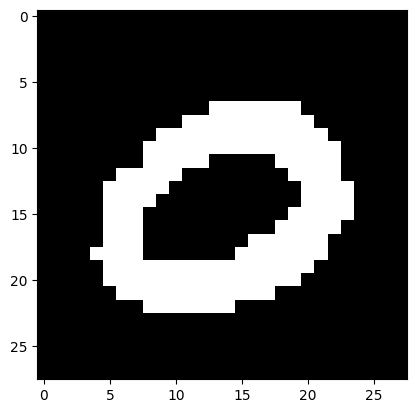

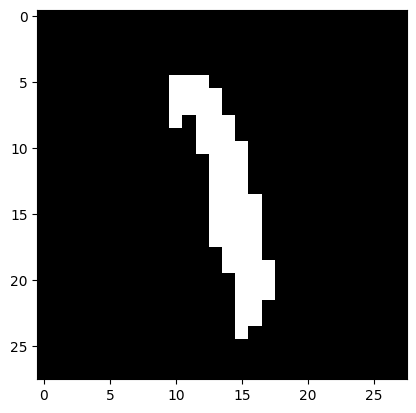

In [4]:
# plot images with index 100, index 101 and index 102
for image in dataset.images()[1000:1003]:
    dataset.plot_image(image)

We will consider classification between two different digits at a time (this is simpler, and will help us try to understand how logistic regression works better).  First, we shall extract all images of ones and twos.

In [5]:
# pick two digits to compare
# the first class is the negative label, the second class is the positive label
class_neg,class_pos = 1,7
# get all images/labels of the above two digits
images,labels = dataset.image_labels_of_digits([class_neg,class_pos])
# convert the labels from (1/7) to (0/1) (or True/False), for logistic regression
labels = labels == class_pos

# get all images/labels of the two digits from the test dataset
test_images,test_labels = test_dataset.image_labels_of_digits([class_neg,class_pos])
test_labels = test_labels == class_pos

We will initialize a logistic regression model, and learn its parameters from the images and the labels, using the call to "fit".  Below we print the resulting accuracy of the model, based on the dataset that we used to train it.

In [6]:
# learn the classifier from data
classifier = LogisticRegression(max_iter=1000)
classifier.fit(images,labels)
# use the classifier to predict the labels of the training set, and then compute the accuracy
predictions = classifier.predict(test_images)
correct = sum(predictions == test_labels)
print("(%d vs %d) accuracy %.4f%% (%d/%d)" % (class_neg,class_pos,
                                              100*correct/len(test_images),
                                              correct,len(test_images)))

(1 vs 7) accuracy 99.3990% (2150/2163)


Let $\mathbf{x}$ be an image, represented as a vector of 784 input pixels, where $x_i$ denotes the $i$-th pixel.

Our logistic regression model has a weight vector $\mathbf{w}$ composed of weights $w_i,$ one for each pixel $x_i.$ We also have a bias $b$; these weights are learned from a dataset.

Once we have learned the weights, our logistic regression model predicts the probability that a new input image $\mathbf{x}$ has a positive label or a negative label.  This probability is computed using the following formula:

$$
\Pr(\mathrm{positive}) = \sigma( w_1 x_1 + \dots + w_n x_n + b )
= \sigma( \textbf{w}^T \textbf{x} + b )
$$
where
$$
\sigma(x) = \frac{1}{1+\exp\{-x\}}
$$
is the logistic (or sigmoid) function.  Remember that the logistic function maps a number from negative infinity to positive infinity.  So the more positive that $x$ is, the closer to one that $\sigma(x)$ is, and the more negative that $x$ is, the closer to zero that $\sigma(x)$ is.

In [7]:
sigmoid = lambda x: 1.0/(1.0+np.exp(-x)) # the logistic function
w = classifier.coef_.T    # weights that we learned from data
b = classifier.intercept_ # bias that we learned from data

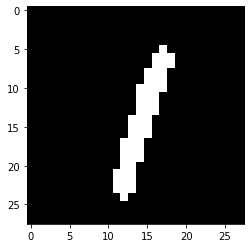

probability in classifier: Pr(digit-1) = 0.997212, Pr(digit-7) = 0.002788
probability we calculated: Pr(digit-1) = 0.997212, Pr(digit-7) = 0.002788


In [7]:
# below, we pick an image, and print out the probability of being class_a vs class_b, as computed by:
#
#   (a) the model
#   (b) manually by ourselves, using the weights and bias that we fetched above
#
# to verify that the computations are the same (this is just a sanity check).
x = test_images[2]
dataset.plot_image(x)
pr_classifier = classifier.predict_proba([x])[0]
pr_manual = sigmoid( w.T@x + b )
print("probability in classifier: Pr(digit-%d) = %.6f, Pr(digit-%d) = %.6f" % (class_neg,pr_classifier[0],class_pos,pr_classifier[1]))
print("probability we calculated: Pr(digit-%d) = %.6f, Pr(digit-%d) = %.6f" % (class_neg,1.0-pr_manual,class_pos,pr_manual))

Below, we visualize the weights $\textbf{w}$ of our linear regression model.

Remember that the positive weights in the logistic regression will push the model right (towards a positive label), and that the negative weights will push the model left (towards a negative label).  Weights that are close to zero correspond to inputs that do not affect the output much.

Below, the red pixels correspond to positive weights, and the blue pixels correspond to negative weights.  White pixels have a value close to zero.

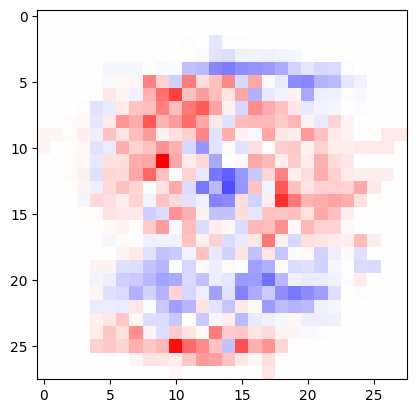

In [8]:
# plot the probability of a pixel being white, given the image was of a zero
limit = max(abs(w))
weight_image = w
dataset.plot_image(weight_image,cmap="bwr",limit=limit)

Next, we look for the image that had the highest probability of being labeled positively (as a digit seven), and then overlay it on the above image, to see why it was classified as a positive label.

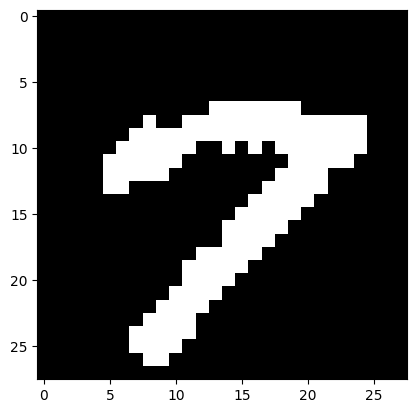

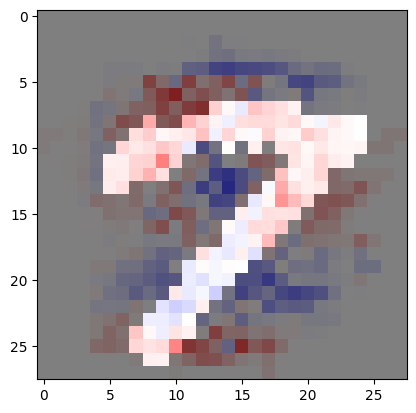

In [9]:
pr = classifier.predict_proba(test_images)
diff_pr = pr[:,1]-pr[:,0]
max_index = np.argmax(diff_pr)
image,label = test_images[max_index],test_labels[max_index]
dataset.plot_image(image)
dataset.plot_image(weight_image,cmap="bwr",limit=limit,second=image)

When we overlay the image of the two onto the red/blue image.  Note that since our inputs (the pixels) are either black (with value 0) or white (with value 1).  Hence, the black pixels contribute zero weight in the logistic regression model (in the summation, inside the logistic function).  Thus, the aggregate sum of the weights of the white pixels determine the output of the logistic regression model.

In this case, we see that the white pixels of the digit seven hit a lot more red pixels than they do blue pixels.

We can do the same for the image that had the highest probability of being a negative label (a digit one), next.

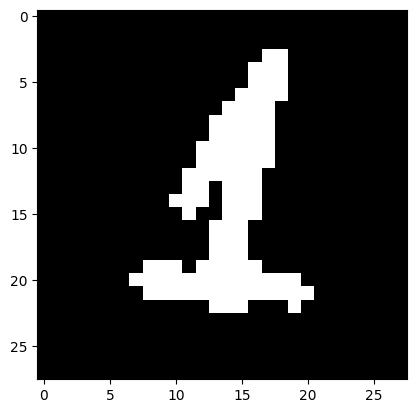

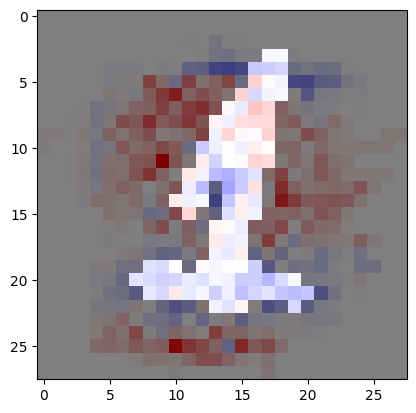

In [10]:
min_index = np.argmin(diff_pr)
image,label = test_images[min_index],test_labels[min_index]
dataset.plot_image(image)
dataset.plot_image(weight_image,cmap="bwr",limit=limit,second=image)

In this case, the white pixels of the digit one hit more blue pixels than red pixels.

In general, for logistic regression, the more red pixels an image hits the more likely the image will be labeled positively (as a digit seven, in this case).  The more blue pixels an image hits, the more likely the image will be labeled negatively (as a digit one, in this case).

Answer the following questions about this logistic regression model learned from the given dataset.

1. Some images that were labeled as a digit seven in the training set were misclassified as being a digit one by the classifier.  Find the image of a seven that had the highest probability of being a one (include a picture).  Explain why the digit was classified as a one instead of as a seven (include a visualization, like we did above).

2. Some images that were labeled as a digit one in the training set were misclassified as being a digit seven by the classifier.  Find the image of a one that had the highest probability of being a seven (include a picture).  Explain why the digit was classified as a seven instead of as a one (include a visualization, like we did above).

3. Train another logistic regression model using any other pair of digits $i$ and $j$, besides $1$ and $7$.  Provide a single example of a digit labeled $i$ being misclassified as $j$, with a visualization of why it was misclassified (like we did above).  (Note that this is only possible if some image of a digit was misclassified, i.e., if it did not get 100% accuracy.)

**Turn in** a pdf containing the answers to the above questions onto the course website under *Assignments* and *Homework 3.*  Assignments are due Friday, June 23 by 11:59pm.  Please start early in case you encounter any unexpected difficulties.

## Question 1

In [14]:
# Find the image of digit seven misclassified as digit one with highest probability
misclassified_seven_as_one_index = np.argmax(diff_pr)
misclassified_seven_as_one_image = test_images[misclassified_seven_as_one_index]

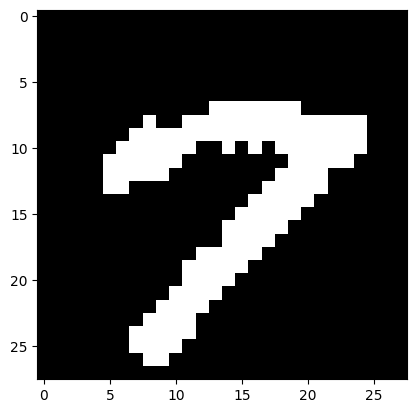

In [15]:
# Visualize the misclassified image
dataset.plot_image(misclassified_seven_as_one_image)

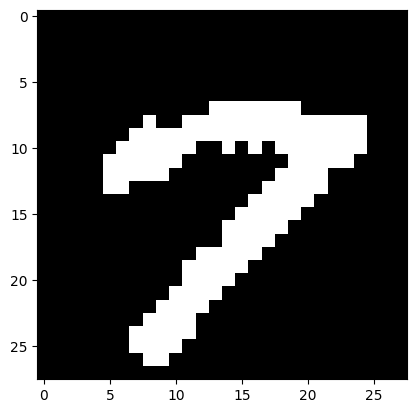

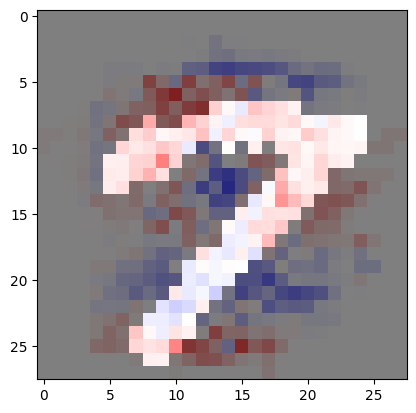

In [18]:
dataset.plot_image(misclassified_seven_as_one_image)
dataset.plot_image(weight_image,cmap="bwr",limit=limit,second=misclassified_seven_as_one_image)

As the red pixels correspond to positive weights and the blue pixels correspond to the negative weights and from the visualization above we can see that the white of the seven digit hit more blue pixel than it hit red pixel hence why it was labelled as one.

## Question 2

In [19]:
# Find the image of digit one misclassified as digit seven with highest probability
misclassified_one_as_seven_index = np.argmin(diff_pr)
misclassified_one_as_seven_image = test_images[misclassified_one_as_seven_index]

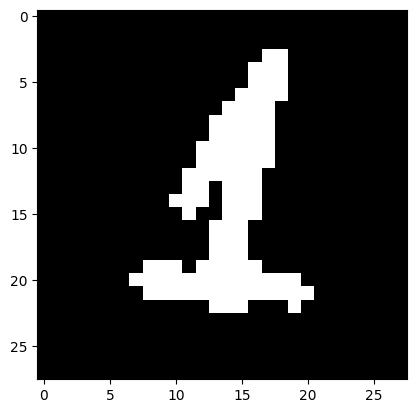

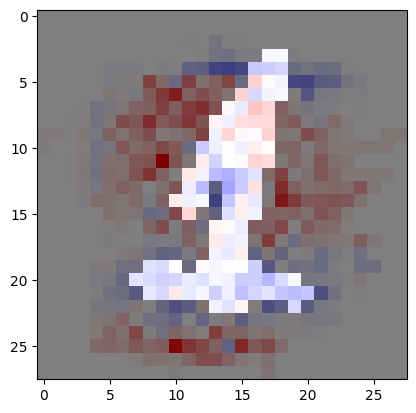

In [21]:
dataset.plot_image(misclassified_one_as_seven_image)
dataset.plot_image(weight_image,cmap="bwr",limit=limit,second=misclassified_one_as_seven_image)

As seen from the visualization, the white of the digit 1 hits more red pixel than it hits blue, hence why it is incorrectly labelled as seven.

## Question 3

In [22]:
# pick two digits to compare
# the first class is the negative label, the second class is the positive label
class_neg,class_pos = 3,8
# get all images/labels of the above two digits
images,labels = dataset.image_labels_of_digits([class_neg,class_pos])
# convert the labels from (3/8) to (0/1) (or True/False), for logistic regression
labels = labels == class_pos

# get all images/labels of the two digits from the test dataset
test_images,test_labels = test_dataset.image_labels_of_digits([class_neg,class_pos])
test_labels = test_labels == class_pos

In [23]:
# learn the classifier from data
classifier = LogisticRegression(max_iter=1000)
classifier.fit(images,labels)
# use the classifier to predict the labels of the training set, and then compute the accuracy
predictions = classifier.predict(test_images)
correct = sum(predictions == test_labels)
print("(%d vs %d) accuracy %.4f%% (%d/%d)" % (class_neg,class_pos,
                                              100*correct/len(test_images),
                                              correct,len(test_images)))

(3 vs 8) accuracy 96.3206% (1911/1984)


In [24]:
sigmoid = lambda x: 1.0/(1.0+np.exp(-x)) # the logistic function
w = classifier.coef_.T    # weights that we learned from data
b = classifier.intercept_ # bias that we learned from data

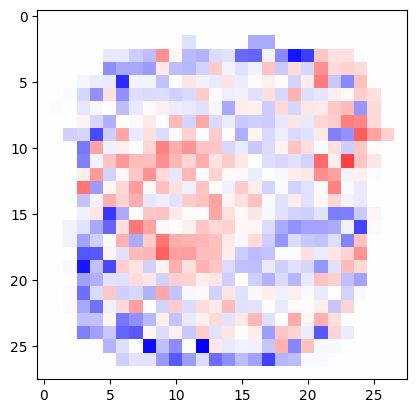

In [25]:
# plot the probability of a pixel being white, given the image was of a zero
limit = max(abs(w))
weight_image = w
dataset.plot_image(weight_image,cmap="bwr",limit=limit)

In [31]:
# Find the image of digit one misclassified as digit seven with highest probability
misclassified_eight_as_three_index = np.argmax(diff_pr)
misclassified_eight_as_three_image = test_images[misclassified_eight_as_three_index]

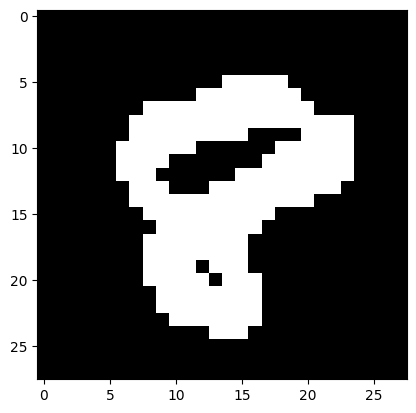

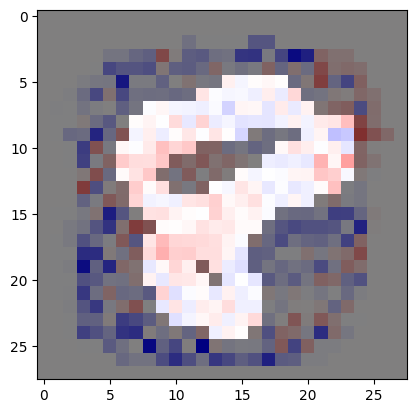

In [32]:
dataset.plot_image(misclassified_eight_as_three_image)
dataset.plot_image(weight_image,cmap="bwr",limit=limit,second=misclassified_eight_as_three_image)

More red equals more eight, and from the above visualization we can see that the 